Nathan McLean,
ECO225: Project 3

# ECO225 Project 3: What is effect of the COVID-19 Pandemic on the 2020 US Presidential Election?

## Introduction

The United States Presidential election in 2020 has been called the most consequential in a lifetime. In the highest voter turnout ever recorded (in terms of the raw number of voters), former Vice President Joe Biden defeated the incumbent President Donald Trump. Among the many controversies of the Trump presidency, Trump's critics often cite his administration's handling of the COVID-19 pandemic as the key fatal flaw that defines his years in office. There is a hotly contested debate among political scholars and pundits as to whether or not the COVID-19 pandemic was what ultimately gave Biden the edge over Trump.

This project seeks to answer the question: what is the effect of the COVID-19 pandemic on the outcome of the 2020 US Presidential election?  To begin this analysis, I provide summary statistics and offer comments on a few key variables of interest. My dependent variable is the proportion of votes that Joe Biden received in the 2020 election within each county of the US.  The independent variables that I will look at most closely in this submission are the number of COVID-19 fatalities in each county (prior to November 1, 2020 – two days before the election), the total population of each county, and the proportion of votes that Hillary Clinton received in the 2016 election within each county. I have also tracked the number of per capita COVID-19 as an alternative version of the analysis (per capita vs. controlling for popultion). 

Message: Overall, quantitative analysis suggests that the COVID-19 pandemic may have been a key determining factor in giving Joe Biden his victory in the 2020 Presidential election. Exploring this analysis, this paper is centred on identifying the extent to which the pandemic influenced the result of the election.

* The primary data I use for this project was assembled by Ethan Schacht in 2020 and is posted on Kaggle.com; the dataset is called "Election, COVID, and Demographic Data by County".  It provides county statistics for COVID-19 case and death counts, demographic and socioeconomic attributes, and election data for both the 2016 and 2020 Presedential elections.


# Project 1

## Summary Statistics

In [350]:
# import the python packages used in the analysis
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
from statistics import mean
import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline

from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

import requests
from bs4 import BeautifulSoup

Loading BokehJS ...

Here, I read the data on Jupyter, and display it as a Data Frame before beginning my analysis and provision of summary statistics/figures.

In [351]:
df = pd.read_csv("county_statistics.csv") # read data

In [352]:
df.head() # explore the data, variable names

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [353]:
df = df.drop(["Unnamed: 0"],axis = 1) # drop unwanted column
df = df.drop_duplicates() # drop duplicate values to clean data


In [354]:
df = df[df['percentage16_Hillary_Clinton'].notna()] 
df = df[df['percentage20_Joe_Biden'].notna()] 

In [355]:
df.head() # confirm that unwanted column has been removed

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


#### Assign variable names to access data frame columns more easily 

In [356]:
p_biden = df["percentage20_Joe_Biden"]
p_clinton = df["percentage16_Hillary_Clinton"]
cov_deaths = df["deaths"]
cov_cases = df["cases"]
population = df["TotalPop"]

#### Describe basic summary statistics for the variables under analysis

In [357]:
p_biden.describe() # basic summary stats for Biden 2020 proportion of vote by county

count    3086.00000
mean        0.32969
std         0.15824
min         0.03100
25%         0.20800
50%         0.29800
75%         0.41800
max         0.94000
Name: percentage20_Joe_Biden, dtype: float64

In [358]:
p_clinton.describe() # basic summary stats for Clinton 2016 proportion of vote by county

count    3086.000000
mean        0.315428
std         0.152480
min         0.031000
25%         0.204000
50%         0.283000
75%         0.397750
max         0.928000
Name: percentage16_Hillary_Clinton, dtype: float64

In [359]:
cov_deaths.describe() # basic summary stats for COVID-19 deaths by county

count    3046.000000
mean       72.733093
std       342.061979
min         0.000000
25%         3.000000
50%        11.000000
75%        36.000000
max      7404.000000
Name: deaths, dtype: float64

In [360]:
population.describe() # basic summary stats for population totals by county

count    3.086000e+03
mean     1.021980e+05
std      3.296527e+05
min      7.400000e+01
25%      1.108450e+04
50%      2.576650e+04
75%      6.710175e+04
max      1.010572e+07
Name: TotalPop, dtype: float64

There are a few things to note from the basic summary of the data above. In every percentile under analysis (as well as the mean) Biden (2020) outperformed Clinton (2016) in terms of the proportion of the vote they received in each county. The mean and median values for those two variables are quite close to one another. Also, there are 1379 more observations for Biden (2020) than there are for Clinton (2016); Schacht, who assembled the dataset, notes that this is in part due to the fact of changing counties in a couple of states.

For the population and COVID-19 deaths summaries it is immediately clear that the mean is substantially greater than the median. The maximum value is also much greater than the 75th percentile in each case.  This is an indication that the distribution of these variables may be highly positively skewed – I check on this with histograms subsequently.

#### Visual depictions of distributions of, and relationships between variables

Text(0.5, 1.0, 'Distribution of Joe Biden Vote Proportions by County')

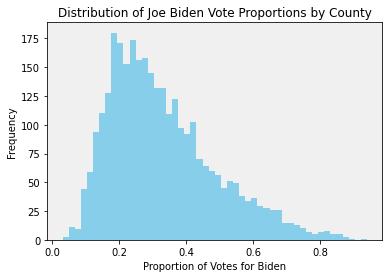

In [361]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(p_biden, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of the proportion of votes won by Biden by county
plt.xlabel('Proportion of Votes for Biden')
plt.ylabel('Frequency')
plt.title('Distribution of Joe Biden Vote Proportions by County')

The graph above illustrates the distribution of the proportion of votes won by Biden by county. Despite the fact that Biden won the election, the mean and median values of the vote proportions for him are clearly less than 50% (0.5). This is because these statistics are not weighted by population. Democrats typically perform best in counties with high population densities – Biden is no exception to this general rule.  This explains why Biden can have a good lot of counties where he only received approximately 20% of the vote and still win the election.

Text(0.5, 1.0, 'COVID-19 Deaths & Vote Proportions for Biden by County')

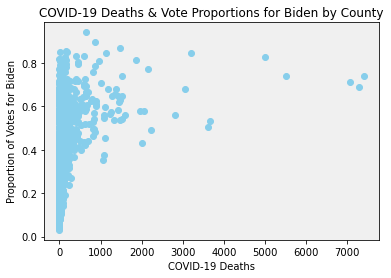

In [362]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.scatter(cov_deaths, p_biden, color = "skyblue") # draw a scatter plot illustrating the relationship between COVID-19 deaths and proportion of votes for Biden
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Proportion of Votes for Biden')
plt.title("COVID-19 Deaths & Vote Proportions for Biden by County")

The graph above seems to depict a weak positive relationship between the proportion of votes for Biden and the number of COVID-19 deaths in a county. By the looks of it, the relationship between the two appears to be non-linear (following an almost logarithmic or square-root function type of shape). Overall, counties with high COVID-19 death counts seemed to favour Biden, however, there is a high concentration of areas with relatively lower COVID-19 deaths (as was stated in the summary statistics, the median is 10 deaths, and the 75th percentile is 35 deaths.  As a result, there are many counties with death totals in the range who favoured either candidate. 

Text(0.5, 1.0, 'Distribution of COVID-19 Deaths by County')

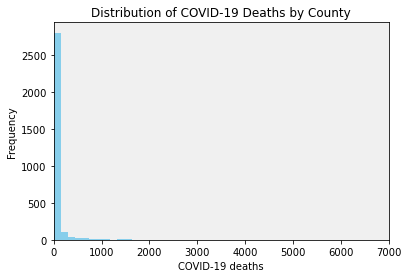

In [363]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.xlim(0, 7000)
plt.hist(cov_deaths, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of COVID-19 deaths by county
plt.xlabel('COVID-19 deaths')
plt.ylabel('Frequency')
plt.title('Distribution of COVID-19 Deaths by County')

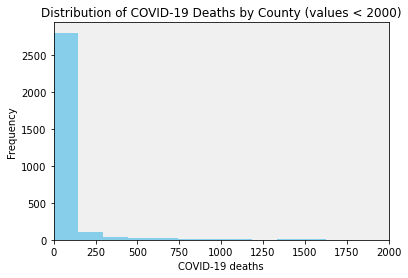

In [364]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(cov_deaths, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of COVID-19 deaths by county for values under 2000
plt.xlim(0, 2000)
plt.xlabel('COVID-19 deaths')
plt.ylabel('Frequency')
plt.title('Distribution of COVID-19 Deaths by County (values < 2000)')
plt.show()

The two graphs above illustrate the distribution of the number of COVID-19 deaths by county. As was expected (based on the summary statistics) the distribution is highly postively skewed. The distribution is in fact so postively skewed that the first graph made it difficult to visualize the distribution, so a second is provided with only values under 2000 (into the 99th percentile). As was aforementioned, this graph describes the fact that there are many counties with relatively few COVID-19 deaths (at the time of November 1, 2020), and a small proportion of counties with multitudes more deaths.

Text(0.5, 1.0, 'Populations & Vote Proportions for Biden by County')

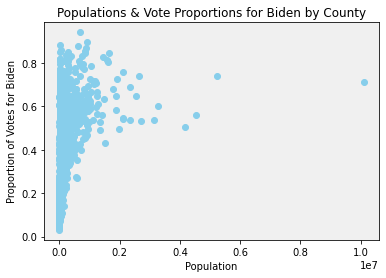

In [365]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.scatter(population, p_biden, color = "skyblue") # draw a scatter plot illustrating the relationship between population and proportion of votes for Biden
plt.xlabel('Population')
plt.ylabel('Proportion of Votes for Biden')
plt.title("Populations & Vote Proportions for Biden by County")

Much like the scatter plot with the COVID-19 deaths before, the graph above depicts a weak positive relationship between the proportion of votes for Biden and the number of COVID-19 deaths in a county. As it was in the prior case, the relationship between the two appears to be non-linear (following an almost logarithmic or square-root function type of shape). There are many more counties with relatively lower populations than there are with large ones.  One of the primary functions of studying population size as part of this analysis is that it likely has an effect on both the proportion of a county's voters who voted a particular candidate (Democrats typically do well in counties with large populations), and the number of COVID-19 deaths (high COVID-19 deaths associated with high population densities). If the size of the population is left unaccounted for in this analysis, it will be a confounder associated with potentially high endogeneity bias.  I have included a scatter plot below which illustrates the relationship between population and COVID-deaths (two of my independent variables); this demonstrates the importance of including it in the analysis.

Text(0.5, 1.0, 'Populations & COVID-19 Deaths by County')

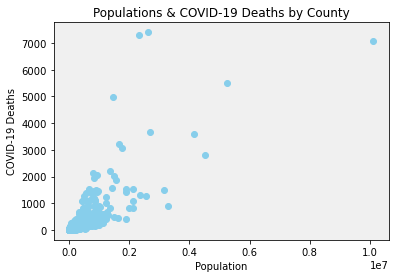

In [366]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.scatter(population, cov_deaths, color = "skyblue") # draw a scatter plot with population and COVID-19 deaths
plt.xlabel('Population')
plt.ylabel('COVID-19 Deaths')
plt.title("Populations & COVID-19 Deaths by County")


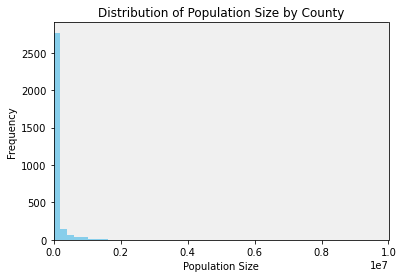

In [367]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(population, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of population by county
plt.xlim(0, 1e7)
plt.ylabel('Frequency')
plt.xlabel('Population Size')
plt.title('Distribution of Population Size by County')
bgcolour = (240/255, 240/255, 240/255)

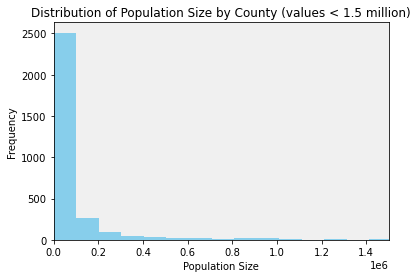

In [368]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(population, bins = 100, color="skyblue") # plot a histogram depicting the distribution of population by county for values under 1.5 million
plt.xlim(0, 1500000)
plt.xlabel('Population Size')
plt.ylabel('Frequency')
plt.title('Distribution of Population Size by County (values < 1.5 million)')
plt.show()

The two graphs above illustrate the distribution of county populations. Again, the distribution is highly postively skewed suchthat a second is valuable to help visualize it; in the second, values under 1.5 million people are provided (into the 99th percentile).  This explains the fact that many more counties have populations below the mean, while only a small proportion of counties hold populations well above it.

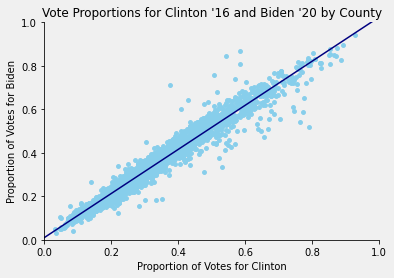

In [369]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
df.plot(kind="scatter", x="percentage16_Hillary_Clinton", y="percentage20_Joe_Biden", ax=ax, s=15, color="skyblue")
bgcolour = (240/255, 240/255, 240/255)
fig.set_facecolor(bgcolour)

# make axis titles for both vertical axis and horizontal axis, as well as the graph title
plt.xlabel('Proportion of Votes for Clinton')
plt.ylabel('Proportion of Votes for Biden')
plt.title("Vote Proportions for Clinton '16 and Biden '20 by County")

plt.xlim(0, 1)
plt.ylim(0, 1)

# plot the regression line of best fit for the scatter plot
lr = LinearRegression()
X = df["percentage16_Hillary_Clinton"].values.reshape(-1, 1)
y = df["percentage20_Joe_Biden"].values.reshape(-1, 1)
lr.fit(X, y)

# assign the colour of line of best fit as a shade of blue (under the RGB specification below)
colour = ("navy")
x = num.linspace(0.0, 1.0).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color=colour)

# format axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The scatter plot above depicts relationship between the proportion of votes for Clinton in 2016 and Biden in 2020 by county.  There is a clear strong postive correlation between the two variables. This is to be expected; most people who voted Democrat in 2016 will also vote Democrat in 2020 (the same is, of course, true for Republicans). That is precisely the reason it is worthwhile to include this variable in the analysis. While the candidates and set of circumstances are different, if one is to isolate for the effect of the COVID-19 pandemic on the 2020 election, using the results of the previous election as a control can help identify differences where they exist – there is the potential for COVID-19 to have played a role in manifesting these differences. 

Text(0.5, 1.0, 'Distribution of Hillary Clinton Vote Proportions by County')

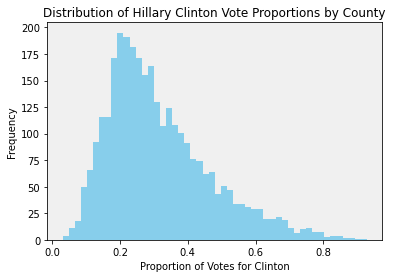

In [370]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(p_clinton, bins = 50, color="skyblue")  # plot a histogram depicting the distribution of %Clinton votes by county
plt.xlabel('Proportion of Votes for Clinton')
plt.ylabel('Frequency')
plt.title('Distribution of Hillary Clinton Vote Proportions by County')

The graph above illustrates the distribution of the proportion of votes won by Hillary Clinton in 2016 by county. Again, even though she won the popular vote, the mean and median values of the vote proportions for him are clearly less than 50% (0.5). There is positive skew in the distribution (albeit far less than the two other independent variabels previously studied). As was the case with the distribution of vote proportions for Biden by county, the counties with higher populations tend to lean the most towards voting for Clinton.

#### This is a function that, when applied, adds a new column to the data frame with a dummy variable indicating whether or not the county is in either Michigan, Wisconsin, Pennsylvania, Georgia, Arizona, or Nevada – the six key swing states Biden won. 

In [371]:
def swing_function(state):
    # function coverts the categorical variable state into a dummy variable that identifies whether or not 
    # the state was one of the six key swing states that Biden won
    
    list_ss_biden_won = ['WI', 'MI', 'PA', 'GA', 'AZ', 'NV']
    
    if state in ['WI', 'MI', 'PA', 'GA', 'AZ', 'NV']:
        return 1
    else:
        return 0
    
df["swing_state_biden_won"] = df['state'].apply(swing_function)


In [372]:
df.head() # confirm that new column has been added

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,swing_state_biden_won
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,0
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,0
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,0
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,0
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,0


# Project 2

### The Message

It appears that the COVID-19 pandemic may have been a key determining factor in giving Joe Biden his victory in the 2020 Presidential election. 

This section describes the process of generating, and ultimately presents a visualization (scatter plot) that can begin to give an indication of what the effect of the pandemic was on the election.

### Focus on subgroup: swing states that Biden won

Because the US Presidential election is often decided by only a few swing states, it is worth narrowing in on them as a subgroup for this analysis. Specifically, I focus on the six swing states that Biden won in 2020, but Hilary Clinton lost in 2016. Because the central concern of this analysis is the outcome of the election, this subgroup could give additional insight into the factors that influenced Biden's victory. 

In [373]:
swingstate_df = df.query("swing_state_biden_won == 1") # new df with only swing states won by Biden

In order to generate a more meaningful visualization, I will plot the proportion of votes for Joe Biden against COVID-19 deaths per captita (rather than simply nominal COVID-19 deaths. To do this, I must add a column to data frame with COVID-19 deaths per capita. This is executed in the code below.

In [374]:
# create new column for COVID-19 deaths per capita
pd.options.mode.chained_assignment = None
swingstate_df['deaths_pc'] = swingstate_df.apply(lambda row: row["deaths"] / row["TotalPop"], axis=1)

In [375]:
swingstate_df.head() # confirm that new column was added

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,swing_state_biden_won,deaths_pc
17,Adams,PA,0.663,0.299,47138.0,31249.0,14077.0,0.663,0.322,56627.0,37563.0,18250.0,39.871404,-77.216103,1184.0,31.0,101589.0,50055.0,51534.0,6.8,89.5,1.4,0.0,0.7,0.0,78227.0,62661.0,1660.0,29685.0,663.0,8.8,13.9,30.1,16.2,22.1,11.0,20.6,82.3,9.1,0.3,3.7,0.9,3.8,27.6,50561.0,83.4,10.7,5.6,0.2,4.9,1,0.000305
19,Adams,WI,0.592,0.374,10107.0,5983.0,3780.0,0.623,0.366,11818.0,7362.0,4329.0,43.969747,-89.767828,587.0,5.0,20111.0,10770.0,9341.0,3.8,90.7,2.7,0.6,0.5,0.0,16837.0,44003.0,1500.0,24874.0,1297.0,13.0,23.3,23.6,22.7,21.8,12.5,19.4,78.5,12.2,0.1,1.5,1.7,6.0,28.3,7530.0,80.7,11.9,7.3,0.2,8.1,1,0.000249
30,Alcona,MI,0.680,0.280,6179.0,4201.0,1732.0,0.686,0.303,7063.0,4848.0,2142.0,44.684686,-83.595079,55.0,3.0,10413.0,5247.0,5166.0,1.4,96.0,0.3,0.5,0.4,0.0,8984.0,39424.0,1705.0,24463.0,1059.0,14.9,21.7,23.5,20.9,22.9,13.2,19.6,80.8,9.6,0.2,1.8,2.3,5.3,24.0,3357.0,78.3,14.0,7.5,0.2,9.3,1,0.000288
36,Alger,MI,0.573,0.368,4513.0,2585.0,1663.0,0.587,0.400,5135.0,3014.0,2053.0,46.412929,-86.602601,121.0,1.0,9254.0,5088.0,4166.0,1.4,84.2,7.2,3.3,0.1,0.0,7779.0,42647.0,5475.0,21771.0,1475.0,13.0,16.6,27.9,23.2,23.1,8.1,17.7,72.9,11.1,2.0,4.3,1.8,8.0,21.3,3160.0,77.1,17.6,5.3,0.0,6.9,1,0.000108
38,Allegan,MI,0.613,0.325,55153.0,33812.0,17932.0,0.616,0.364,67182.0,41381.0,24447.0,42.591470,-85.891029,1503.0,7.0,114145.0,56997.0,57148.0,7.2,88.7,1.3,0.5,0.6,0.0,84358.0,58487.0,1264.0,27172.0,539.0,10.8,14.3,30.3,14.7,20.1,12.4,22.5,86.0,7.6,0.3,1.4,0.7,4.1,23.9,54028.0,86.3,7.7,5.9,0.2,3.6,1,0.000061


#### Assign variable names to access data frame columns more easily 

In [376]:
p_biden_2 = swingstate_df["percentage20_Joe_Biden"]
p_clinton_2 = swingstate_df["percentage16_Hillary_Clinton"]
cov_deaths_2 = swingstate_df["deaths"]
population_2 = swingstate_df["TotalPop"]
d_pc = swingstate_df["deaths_pc"]

In [377]:
d_pc.describe() # from variable description, boundaries for visualizes can be approximated

count    413.000000
mean       0.000668
std        0.000688
min        0.000000
25%        0.000207
50%        0.000459
75%        0.000872
max        0.005077
Name: deaths_pc, dtype: float64

### Process of Visualization

To begin the process of conceiving my visualization, I drew out a sketch of what I imagined the final result might look like on pen and paper. This is shown in the image below where I intend to plot the COVID-19 deaths per capita on the x-axis, and the proportion of votes for Biden on the y-axis. From my prior work, I anticipate there may likely be a positive correlation between the two; this is reflected by line of best fit in the scatter plot. Once again, this section of the analysis focuses on the subgroup of swing states won by Biden.

![](eco225_sketch_2.png)

#### As in the 'Project 1' section of this paper, I have plotted the distributions of each key variable – this time just by the subgroup of swing states won by Biden.

Text(0.5, 1.0, 'Distribution of Joe Biden Vote Proportions by County')

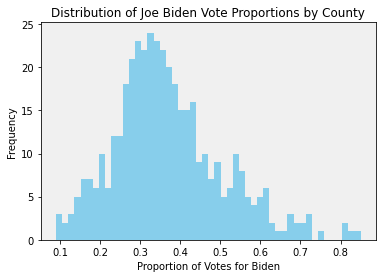

In [378]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(p_biden_2, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of the proportion of votes won by Biden by county
plt.xlabel('Proportion of Votes for Biden')
plt.ylabel('Frequency')
plt.title('Distribution of Joe Biden Vote Proportions by County')

The graph above illustrates the distribution of the proportion of votes for Biden by county in the subgroup of swing states Biden won. This is an approximately similar shape to the overall distribution of the dataset. Because this subgroup only features states that Biden actually won, the distribution is shifted to marginally higher values.

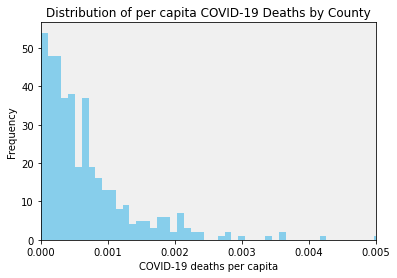

In [379]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(d_pc, bins = 50, color = "skyblue") # plot a histogram depicting the distribution of COVID-19 deaths by county for values under 2000
plt.xlim(0, 0.005)
plt.xlabel('COVID-19 deaths per capita')
plt.ylabel('Frequency')
plt.title('Distribution of per capita COVID-19 Deaths by County')
plt.show()

The graph above illustrates the distribution of COVID-19 deaths per capita by county in the subgroup of swing states Biden won. Much like the previous graphs related to COVID-19 deaths, the deaths per capita in this subgroup has a highly positively skewed distribution. This is indicative that the are many counties with very little COVID-19 deaths (on a per capita basis), while there is a small number of counties that have much higher per capita COVID-19 deaths.

### Draft of Visualization

Text(0.5, 1.0, 'Vote Proportions for Biden & per capita COVID-19 Deaths by County')

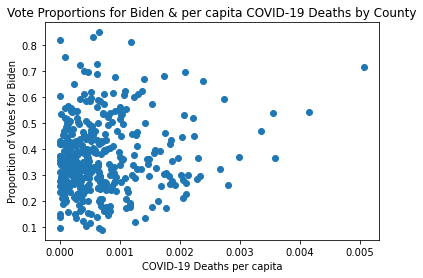

In [380]:
plt.scatter(d_pc, p_biden_2) # draw a scatter plot illustrating the relationship between COVID-19 deaths and proportion of votes for Biden
plt.xlabel('COVID-19 Deaths per capita')
plt.ylabel('Proportion of Votes for Biden')
plt.title("Vote Proportions for Biden & per capita COVID-19 Deaths by County")

The graph above is a draft version of my visualization before fine tuning. As is shown by the axis labels, the proportion of votes for Biden is plotted against COVID-19 deaths per capita, where a county in a swing state that Biden won is the unit of observation.

### Create final graph to visualize the subgroup of counties from swing states that Biden won

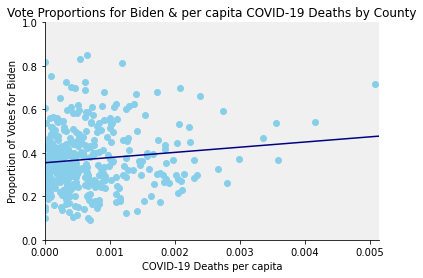

In [381]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.scatter(d_pc, p_biden_2, color = "skyblue") # draw a scatter plot illustrating the relationship between COVID-19 deaths and proportion of votes for Biden
plt.xlabel('COVID-19 Deaths per capita')
plt.ylabel('Proportion of Votes for Biden')
plt.title("Vote Proportions for Biden & per capita COVID-19 Deaths by County")

plt.xlim(0, .00515)
plt.ylim(0, 1)

# plot the regression line of best fit for the scatter plot
lr = LinearRegression()
X = d_pc.values.reshape(-1, 1)
y = p_biden_2.values.reshape(-1, 1)
lr.fit(X, y)

# assign the colour of line of best fit as a shade of blue (under the RGB specification below)
colour = ("navy")
x = num.linspace(0.0, 1.0).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color=colour)

# format axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The graph above is the final fine-tuned version of the scatter plot where the proportion of votes for Biden is plotted against COVID-19 deaths per capita in the six swing states that Biden won. As anticipated in the sketch, there is a positive relationship between the two variables – this is reflected in the regression line of best fit. Counties with higher per capita deaths of COVID-19 deaths are correlated with counties that vote in higher proportions for Biden (in the swing states won by Biden). Because of the positively skewed distribution of the COVID-19 deaths per capita variable, there are many more observations concentrated on the left side of the horizontal axis.

## Mapping: Visualizing the Data

Mapping is a useful tool to help visualize data across a geographic region. In this section, I make a set of maps to illustrate the 2020 election results data, as well as the variance in COVID-19 deaths throughout various regions of the US.

I also provide a map that illustrates the geographic distribution of the proportion of adults living in poor health by county.  This data is not contained in my existing data frame, so I must add it in from an external data source. To do this, I merge my data below with another dataset and the same geographic level (US county level) that provides the proportion of adults who report living in poor health by county. By adding this information to my dataset, I can identify the geographic variation of those living in poor health; this is thought to be a determining factor in COVID-19 deaths – people in good health are relatively much less likely to experience COVID-19 mortality. 

I have significantly simplified the data, but it comes from a much more detailed and larger dataset entitled "County Health Rankings 2019-2020", assembled by Akhil Raja, and is available on Kaggle.com.

In [382]:
df_health = pd.read_csv("analytic_data2020.csv") # read data

In [383]:
df_3 = df_health.merge(df, left_on = ["Name", "State Abbreviation"], right_on = ["county", "state"], how = "inner")

In [384]:
pd.options.mode.chained_assignment = None
df['deaths_pc'] = df.apply(lambda row: row["deaths"] / row["TotalPop"], axis=1)

Some counties in different states of the US have the same name. There are, for instance, 26 different Jefferson counties across different states within the country. To account for this, I use the dictionary below to map fips codes and state abbreviations in order for the subsquent merged data to have the correct county in each state. 

In [385]:
    fips_to_state = {
        "01": "AL", "02": "AK", "04": "AZ", "05": "AR", "06": "CA",
        "08": "CO", "09": "CT", "10": "DE", "11": "DC", "12": "FL",
        "13": "GA", "15": "HI", "16": "ID", "17": "IL", "18": "IN",
        "19": "IA", "20": "KS", "21": "KY", "22": "LA", "23": "ME",
        "24": "MD", "25": "MA", "26": "MI", "27": "MN", "28": "MS",
        "29": "MO", "30": "MT", "31": "NE", "32": "NV", "33": "NH",
        "34": "NJ", "35": "NM", "36": "NY", "37": "NC", "38": "ND",
        "39": "OH", "40": "OK", "41": "OR", "42": "PA", "44": "RI",
        "45": "SC", "46": "SD", "47": "TN", "48": "TX", "49": "UT",
        "50": "VT", "51": "VA", "53": "WA", "54": "WV", "55": "WI",
        "56": "WY",  # dictionary maps FIPS to state
    }

In [386]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip") # read county map file
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip") # read state map file

In [387]:
county_df["state"] = county_df["STATEFP"].map(fips_to_state) # map FIPS codes to state abv. in county dataframe

In [388]:
# in order to make the map more easily readable, eliminate all values from state and county files not in continental US
r_fp = ["78", "72", "69", "66", "60", "15", "02"]
r_st = ["AK", "AS", "GU", "HI", "MP", "PR", "VI"] # locates locations outside of the continental US

state_df = state_df[~state_df["STUSPS"].isin(r_st)] # eliminate states not in the continental US, as given by r_st above
county_df = county_df[~county_df["STATEFP"].isin(r_fp)] # eliminate counties not in the continental US, as given by r_fp above

merged_df = county_df.merge(df, left_on = ["NAME", "state"], right_on = ["county", "state"], how = "inner") # merge mapping data with original dataframe
merged3_df = county_df.merge(df_3, left_on = ["NAME", "state"], right_on = ["county", "state"], how = "inner")

### Maps with US Election and COVID-19 Data

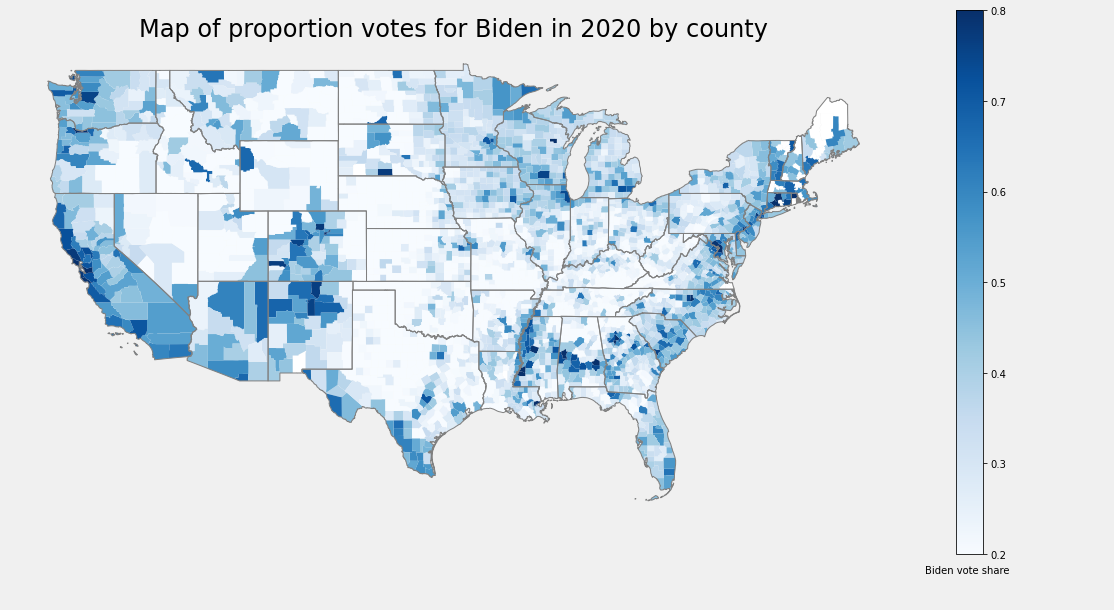

In [389]:
# plot a fine-tuned map of the proportion of votes for Biden in 2020 by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)

county_df.plot(ax=gax, color = "white", edgecolor= "None")
merged_df.plot(
    ax=gax, edgecolor= "None", column="percentage20_Joe_Biden", cmap = "Blues",legend=True, vmin=0.2, vmax=.8)
state_df.plot(ax=gax, edgecolor="grey", color="None")

gax.annotate('Biden vote share',xy=(0.83, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of proportion votes for Biden in 2020 by county", fontsize=24)

plt.show()


The map above illustrates the proportion of votes for Biden across each county of the US in the 2020 Presidential election. The darker areas of the map represent counties in which Biden performed best. It is no surprise that, as democrats tend to, Biden performed well on the coasts. There are, however, some smaller (by population) states in the middle of the US in which Biden received a small proportion of the votes. Interestingly, from the map, it is possible to identify counties with large cities in which Biden tended to receive a significant proportion of the vote. These come up as small dark blue areas on the map.

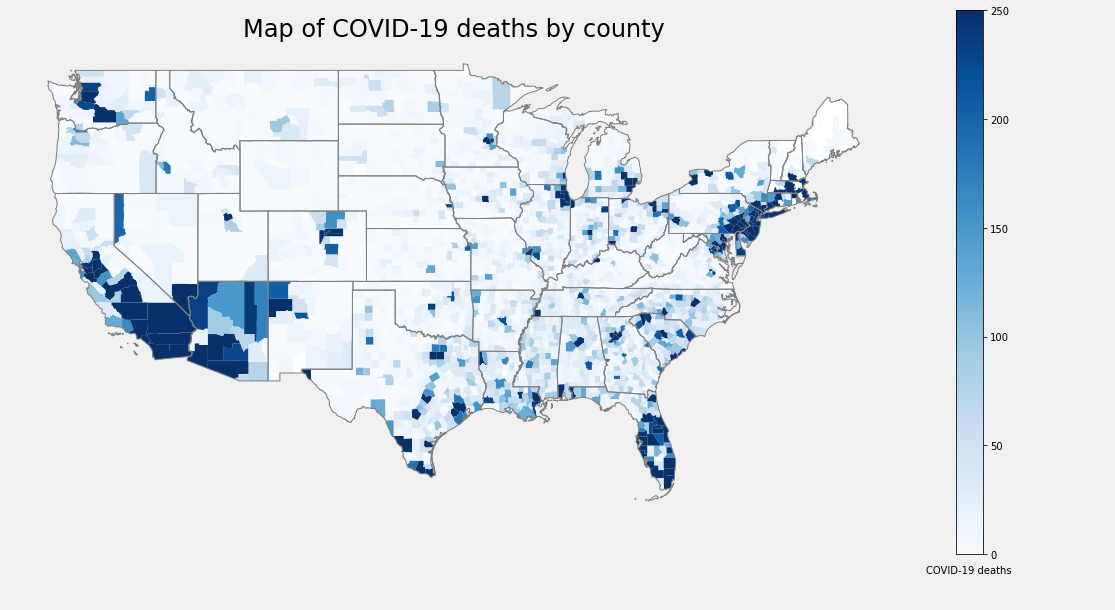

In [390]:
# plot a fine-tuned map of the COVID-19 deaths by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)
county_df.plot(ax=gax, color = "white", edgecolor= "None")
merged_df.plot(
    ax=gax, edgecolor= "None", column="deaths", cmap = "Blues",legend=True, vmin=0, vmax=250)
state_df.plot(ax=gax, edgecolor="grey", color="None")

gax.annotate('COVID-19 deaths',xy=(0.83, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of COVID-19 deaths by county", fontsize=24)

plt.show()

The map above illustrates the number of COVID-19 deaths by county in the US, prior to the 2020 Presidential election. Areas in dark blue on the map show counties that experienced the highest number of COVID-19 deaths; on the other hand, the lighter the region on the map, the fewer COVID-19 deaths occured in that county. It is worth noting that there are often states with clusters of counties with a high number of COVID-19 cases: Florida, Arizona, California, Washington, and a few states in the Northeast. 

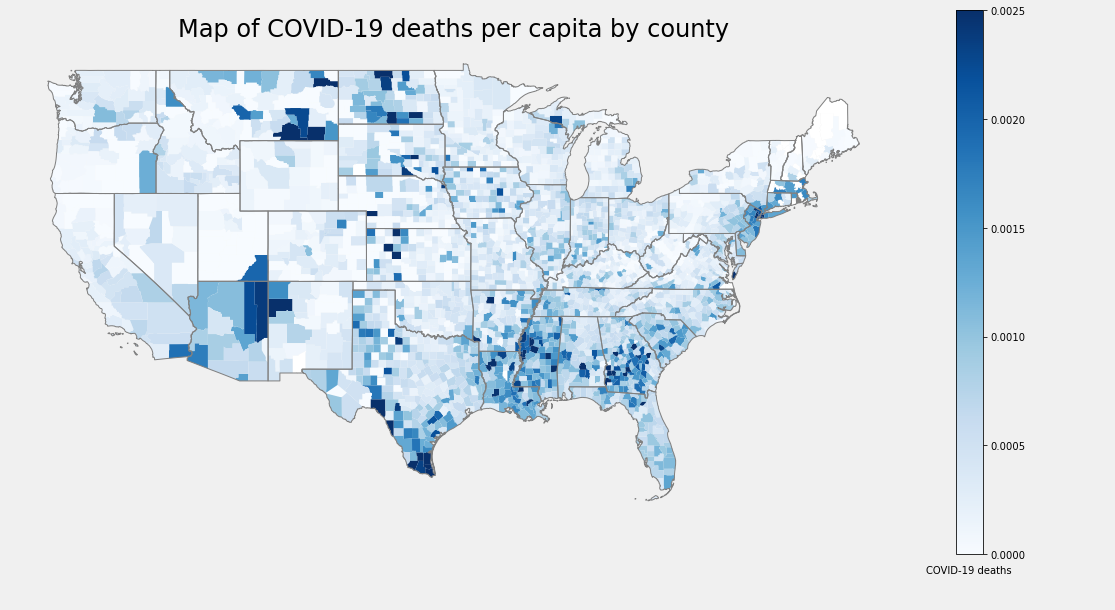

In [391]:
# plot a fine-tuned map of the per capita COVID-19 deaths by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)
county_df.plot(ax=gax, color = "white", edgecolor= "None")
merged_df.plot(
    ax=gax, edgecolor= "None", column="deaths_pc", cmap = "Blues",legend=True, vmin=0, vmax=0.0025)
state_df.plot(ax=gax, edgecolor="grey", color="None")

gax.annotate('COVID-19 deaths',xy=(0.83, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of COVID-19 deaths per capita by county", fontsize=24)

plt.show()

The map above illustrates the number of per capita COVID-19 deaths by county in the US, prior to the 2020 Presidential election. Similar to the previous graph, areas in dark blue on the map show counties that experienced the highest number of COVID-19 deaths per capita, while lighter regions have fewer per capita deaths. When the number of COVID-19 deaths is divided by the population (per capita deaths), one can identify different trends that in the previous map. Counties in states across the South seem to experience higher incidences of per capita COVID-19 deaths. This is likely due to the fact that they had reasonably high COVID-19 deaths, and lower populations than some of the counties which experienced the most deaths nominally speaking.

### Map with merged data: Health Statistics

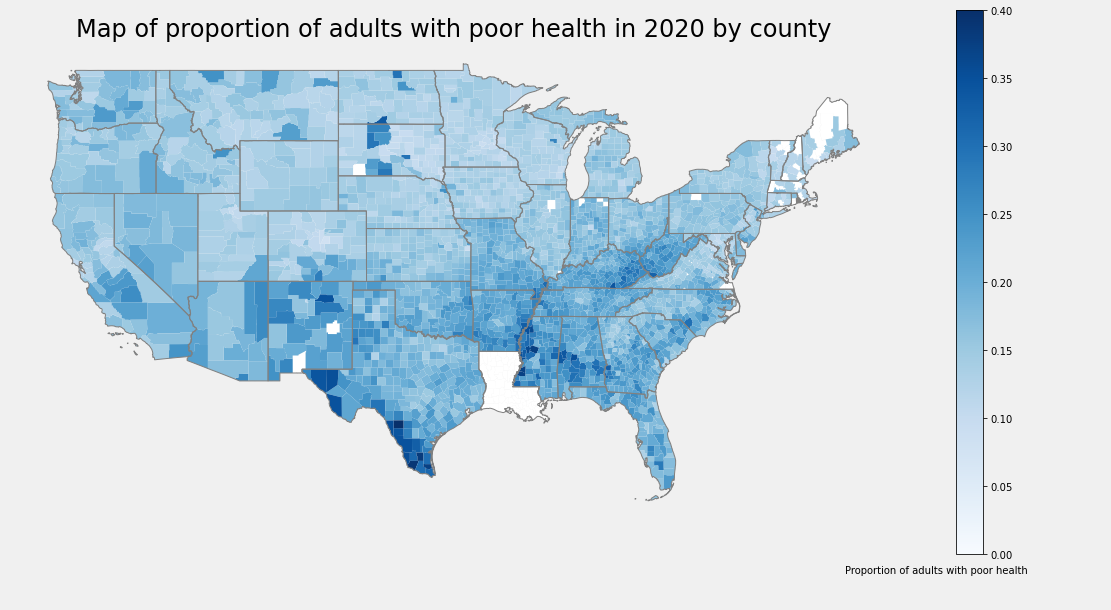

In [392]:
# plot a fine-tuned map of the proportion of adults in poor health in 2020 by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)

county_df.plot(ax=gax, color = "white", edgecolor= "None")
merged3_df.plot(
    ax=gax, edgecolor= "None", column="Poor or fair health raw value", cmap = "Blues",legend=True, vmin=0, vmax=.4)
state_df.plot(ax=gax, edgecolor="grey", color="None")

gax.annotate('Proportion of adults with poor health',xy=(0.76, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of proportion of adults with poor health in 2020 by county", fontsize=24)

plt.show()

The map above illustrates the proportion of adults who report living in poor health in 2020 by county in the US. The darkest areas on the map represent counties in which the greatest proportion of the population lives in poor health. This is particularly relevant when compared to the COVID-19 deaths map. It is well known that being in poor or frail health is a determining and causal factor that can lead to mortality in the event that one is infected with COVID-19. As an example of how this map may give insight, in the South of Texas there seem to be a cluster of counties in which there are large proportions of people living in poor health – this cluster of counties also experienced high COVID-19 mortality.

* Note: the health data is missing for Louisiana, as well as a small number of other counties across the country

## Interactive Maps 

##### html link: https://drive.google.com/file/d/1btDRY2MCMhQEi_Z3ZsTEXwxY5X2PMsIq/view?usp=sharing

In this section, I return to the swing states – in particular, I use a couple interactive maps of Georgia to illustrate the proportion of votes for Biden (with labels for the per capita COVID-19 deaths), as well as the proportion of votes for Clinton in 2016 (with labels for the proportion Biden received in 2020). Georgia holds 16 electoral college votes, and, as a swing state that often votes Republican but voted for Biden over Trump in 2020, was integral to Biden's victory. Focusing on a single state can make an interactive map more approachable, where it is easy to identify barriers between counties and geographic trends in how a county votes. 

In [330]:
georgia_results = merged_df.query("STATEFP == '13'") # use FIPS code to isolate counties in Georgia from merged file

In [331]:
interactive_df =GeoJSONDataSource(geojson=georgia_results.to_json())

### Interactive Map for Biden Proportion

In [332]:
# plot an interactive Map for the proportion of votes received by Biden in 2020
# add labels for the number of COVID-19 deaths, and deaths per capita, county name, and % Biden

color_mapper = LinearColorMapper(palette = ('#f7fbff', '#deebf7', '#c6dbef', '#c6dbef', '#6baed6', '#4292c6','#2171b5', '#084594'), low = 0.1, high = 0.9)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@county'),('Proportion Biden', '@percentage20_Joe_Biden'),
                               ('COVID-19 Deaths','@deaths'), ('Per capita deaths', '@deaths_pc')])
p = figure(title="Proportion of votes for Biden by county in Georgia", tools=[hover])
p.patches("xs","ys",source=interactive_df,
          fill_color = {'field' :'percentage20_Joe_Biden', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
                              
show(p)

The interactive map above shows the proportion of votes for Biden across the counties of Georgia. Darker areas on the map voted for Biden in the largest proportions. Labels also identify the nominal number of COVID-19 deaths reported in that county, as well as COVID-19 deaths per capita. The map illustrates that the counties near and containing Atlanta (Clayton, Dekalb, Fulton) vote most heavily for Biden; they also have a high number of COVID-19 deaths in nominal terms. These are counties with large populations – they tend to vote democrat and were most affected by COVID-19.

### Interactive Map for Clinton 2016 Proportion

In [333]:
# plot an interactive Map for the proportion of votes received by Clinton in 2016
# add labels for the county name, % biden and % clinton

color_mapper = LinearColorMapper(palette = ('#f7fbff', '#deebf7', '#c6dbef', '#c6dbef', '#6baed6', '#4292c6','#2171b5', '#084594'), low = 0.1, high = 0.9)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@county'),('Proportion Clinton', '@percentage16_Hillary_Clinton'),
                               ('Proportion Biden', '@percentage20_Joe_Biden')])
p = figure(title="Proportion of votes for Clinton by county in Georgia", tools=[hover])
p.patches("xs","ys",source=interactive_df,
          fill_color = {'field' :'percentage16_Hillary_Clinton', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
                              
show(p)

The interactive map above is inspired by the helpful graphics used on TV stations on election night as results are coming in. In its labels, it compares the proportion of votes for Clinton in 2016, and for Biden in 2020. The colours of the map are in accordance with the proportion of votes for Clinton in each Georgia county in 2016. In dark blue areas, she received a high proportion of votes; in light blue, she received a low proportion. It is interesting to note that Clinton and Biden performed very similarly in counties that voted overwhelmingly for Trump. But in counties in which Clinton did well, Biden did even better. This is particularly seen in the counties containing and around Atlanta – Clayton, Dekalb, Fulton, Herny and Rockdale. Among other factors, this could be due to politcal movements that sought to increase voter turnout in such counties.

# Project 3

### Scraping data

Though the original dataset on which this analysis is based is already rich, there is external information that – if available to include in the data – would provide clearer evidence about the extent to which the COVID-19 pandemic impacted the results of the 2020 election.

Without additional controls or more data to contextualize this analysis, likely the greatest endogeneity problem lies in the fact that this empirical strategy effectively assumes that the change between the proportion of people that voted for Clinton in 2016 and the proportion that voted for Biden in 2020 is entirely attributable to COVID-19. This is, in all likelihood, not the case. For instance, sexism and foreign election interference are often cited as reasons that costed Clinton votes in 2016 – this would not apply to Biden. Moreoever, there are many factors occuring during the period that Trump held office that may influence a voter's decision in his re-election bid (not just COVID-19).  

In order to further identify the explanation as to why counties voted differently in 2016 and 2020 (and get a closer look at what proportion of that change may be associated with COVID-19), I would scrape exit poll data from the 2020 election. Exit polling data gives a direct look into the opinions of voters immediately after they have voted, and gives insight into why they voted as they did. For instance, the exit poll conducted by Fox News collected data from a sample of voters across all 50 states. There were nearly 110,000 respondents nationwide. The link to this website which contains the results from the exit poll (coded in html) is available here: https://www.foxnews.com/elections/2020/general-results/voter-analysis?state=US

These exit polls give information about how voters who voted for each candidate consider the issue of the COVID-19 pandemic when making their decision about who to vote for. The survey asks questions about the extent to which the voter views the pandemic as "under control" at the time of the election, how important the pandemic is in determining their vote, and which candidate they think would lead the country better specifically as it pertains to the pandemic. This data would be valuable to my analysis because it would give me the best possible indication of how voters arrived at their decision, and how this may have related to the pandemic. The Fox News exit poll also provides data on a state by state level, allowing for a focus on specific states that were particularly important in determining the result of the election. Knowing the role COVID-19 played in determining how people approached their vote is fundamentally what my analysis about – people's approach to their vote is ultimately what determines the result of an election.

In terms of merging this data with the data I already have, the only issue is that my existing data is at the county level while the exit poll data is at the state level. Therefore, the existing data is more granular. Nonetheless, especially because the electoral college is determined at the state level, a reference of how people approached their vote at the state level is still very worthwhile. My existing data also contains state identifiers so it is easily mergeable once the exit poll data is scraped and formatted into a dataframe. This data can be used in my analysis as a means of contextualizing my results. It can give me an idea of how much of the variation in the proportion of the vote for Clinton to the proportion of the vote for Biden is attributable to COVID-19 on a regional level. 

My program does not need to be run more than once, nor does it need to be run over an extended time period. All of the data is available at the link above. The main challenge in scraping the data for the purposes of this project lies in the way the data is formatted on the site. Rather than being in a single large table (or even divided by question/state), each question in survey is provided in a seperate table for each state. This makes scraping the data tedious, although still entirely possible with more time on hand. For this reason, I will be using a different websource containing alternate data for the purposes of this project. 

Below, I scrape the code from the Wikipedia page that contains income statistics for each state in the US:

The Wikipedia table which I will be scraping is available at the link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income. This provides my analysis with state-level figures for a variety of income measures – including, income per captita. This may be helpful in understanding how state voting trends in the 2020 election may be explained by the differences in average annual income from state to state.

In [334]:
web_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income' # this is the wiki link noted above
response = requests.get(web_url)

In [335]:
soup_object = BeautifulSoup(response.content) # use BeautifulSoup to scrape the full content of wiki data 

In [336]:
data_table = soup_object.find_all('table', 'wikitable sortable')[1] # this draws out the second table from the wiki page

In [337]:
all_values = data_table.find_all('tr')

In [338]:
state_inc = pd.DataFrame(columns = ['Rank', 'State or territory', 'Per capita income', 'Median household income', 
                                    'Median family income', 'Population', 'Number of households', 
                                    'Number of families']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    rank = values[0].text.strip()
    state = values[1].text.strip()
    pc_inc = values[2].text.strip()
    med_hinc = values[3].text.strip()
    med_finc = values[4].text.strip()
    pop = values[5].text.strip()
    num_h = values[6].text.strip()
    num_f = values[7].text.strip()
    
    state_inc.loc[ix] = [rank, state, pc_inc, med_hinc, med_finc, pop, num_h, num_f] # Store it in the dataframe as a row
    ix += 1
    

When the data is scraped from the table on the Wikipedia page and converted into a dataframe, the variables are converted as strings. This is because the values in the table on Wikipedia contain dollar signs and commas. The code below removes the dollar signs and commas from the values in the dataframe and then coverts the type of the columns from strings to integers. 

In [339]:
# remove $ and , and convert from string to integers
state_inc["Per capita income"] = state_inc["Per capita income"].apply(str.replace, args=(",", ""))
state_inc["Median household income"] = state_inc["Median household income"].apply(str.replace, args=(",", ""))
state_inc["Median family income"] = state_inc["Median family income"].apply(str.replace, args=(",", ""))
state_inc["Population"] = state_inc["Population"].apply(str.replace, args=(",", "")).astype(int)
state_inc["Number of households"] = state_inc["Number of households"].apply(str.replace, args=(",", "")).astype(int)
state_inc["Number of families"] = state_inc["Number of families"].apply(str.replace, args=(",", "")).astype(int)
state_inc["Per capita income"] = state_inc["Per capita income"].apply(str.replace, args=("$", "")).astype(int)
state_inc["Median household income"] = state_inc["Median household income"].apply(str.replace, args=("$", "")).astype(int)
state_inc["Median family income"] = state_inc["Median family income"].apply(str.replace, args=("$", "")).astype(int)

In order to merge, there needs to be uniformity between both dataframes on the conventions for states (abbreviation versus full name). The dictionary below converts between abbreviations and full names for all 50 states.

In [340]:
states_to_sa = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California",
                "CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia",
                "HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas",
                "KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
                "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana",
                "NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico",
                "NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
                "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
                "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
                "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"} # dictionary maps state abbreviations to states

The code below merges the new data harvested from the Wikipedia table that contains income measures by state onto the existing US county level election results and COVID-19 data.

In [341]:
merged3_df["state"] = merged3_df["State Abbreviation"].map(states_to_sa) # map state abv. to state names in county dataframe

In [342]:
pd.set_option('display.max_columns', None) # increase number of columns visible in notebook

In [343]:
merged3_df = state_inc.merge(merged3_df, left_on = ["State or territory"], right_on = ["state"], how = "inner")

In order to visualize the distribution of per capita income between the states, I generate the histogram below.

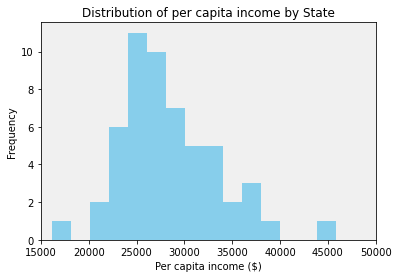

In [344]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(state_inc["Per capita income"], bins = 20, color="skyblue") # plot a histogram
plt.xlim(15000, 50000) # set x-axis range
plt.xlabel('Per capita income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of per capita income by State')
plt.show()

As the histogram above indicates, most states have per capita incomes between 22500 and 34000 USD. The data is most concentrated around a value of approximately 25000 USD. This indicates a very slight positive skew in a what, quite broadly speaking, appears to approximate a bell shaped distribution. Importantly, however, this histogram illustrates that there is substantial variation in per capita income from state to state. Some states, therefore, contain signifcantly higher earners (in terms of the state average) than do other states.

In [345]:
statemp_df = state_df.merge(state_inc, left_on = ["NAME"], right_on = ["State or territory"], how = "inner")
            # merge the newly scraped data with the state level geographic data in preparation for a map

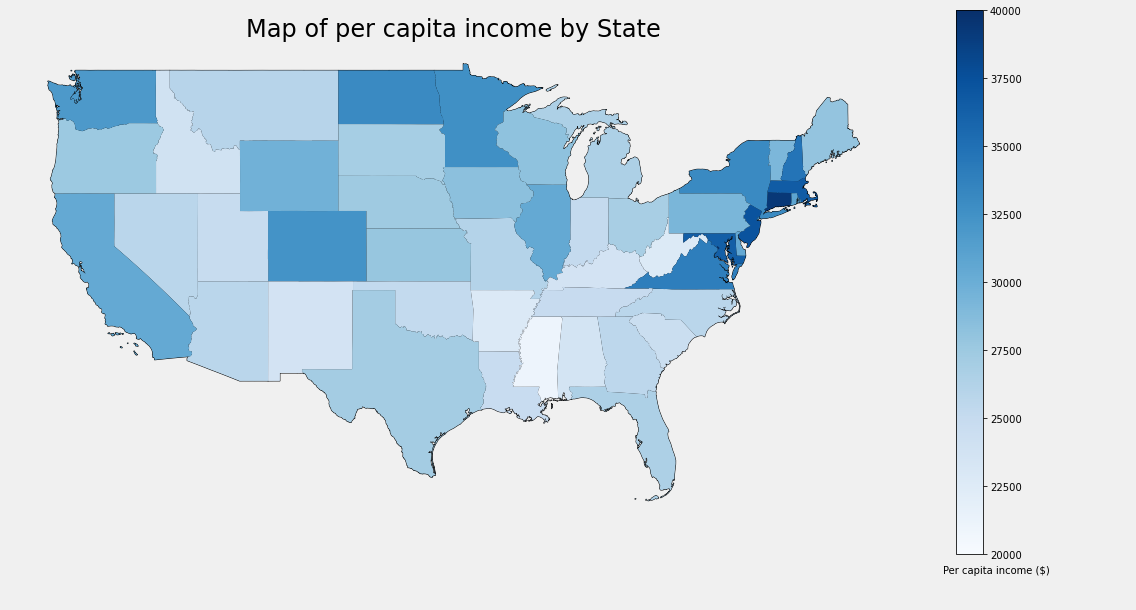

In [346]:
# plot a fine-tuned map of the per capita COVID-19 deaths by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)
state_df.plot(ax=gax, edgecolor="black", color="None")
statemp_df.plot(
    ax=gax, column="Per capita income", cmap = "Blues",legend=True, vmin=20000, vmax=40000)


gax.annotate('Per capita income ($)',xy=(0.83, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of per capita income by State", fontsize=24)

plt.show()

The map above illustrates per capita income by state in the US, prior to the 2020 Presidential election. Areas in dark blue on the map show states with the highest per capita incomes, while lighter regions on the map represent states with lower per capita incomes. There are some important geographic trends to make note of in this graph. As was described earlier in reference to the histogram that plotted incomes by state, there is significant state to state variation in incomes. From the map, it seems that there is a sort of cluster of high income states in the Northeast. These states voted overwhelmingly for Biden (and generally lean Democrat). The same is true with respect to income for other states that lean democrat – California and Washington, for instance. When compared to the map in the previous section that illustrated the geographic distrbution of votes per candidate, it is clear that there are (well documented) correlations between geographies, income, and voting trends.

### Merging with new data

In the 'Project 2' component of this paper, I had previously supplemented my dataset with data on county health statistics in the US. I used a simplified version of the health data – only taking the variables that are strictly relevant to this analysis, but it comes from a much more detailed and larger dataset entitled "County Health Rankings 2019-2020", assembled by Akhil Raja, and is available on Kaggle.com. The code for merging this data onto the original dataframe is above under the subheading "Mapping: Visualizing the Data". Both the original data and the health data are provided at the same geographic level (US county level). The new data provides the proportion of adults who report living in poor health by county. As I mention above, in including this information to my dataset, I can identify the geographic variation of those living in poor health. The condition of one's health is thought to be a determining factor in COVID-19 deaths – people in poor health experience fatality relatively more often once exposed to COVID-19. 

I provide the first row of the fully merged dataframe (including both the merged health data, and the scraped income data from Wikipedia) below:

In [347]:
merged3_df.head(1) # show first row and column headers for entire dataframe

,Rank,State or territory,Per capita income,Median household income,Median family income,Population,Number of households,Number of families,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,state,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Poor or fair health raw value,Adult obesity raw value,county,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,swing_state_biden_won
0,2,Connecticut,39373,70048,88819,3596677,1355817,887263,09,013,00212668,0500000US09013,09013,Tolland,06,1062731511,17531739,"POLYGON ((-72.51333 41.94540, -72.49273 41.947...",Connecticut,9,13,9013,CT,Tolland,0.104704,0.249,Tolland,0.441,0.499,77069.0,33989.0,38450.0,0.429,0.551,9257.0,3975.0,5103.0,41.858538,-72.330848,1780.0,68.0,151596.0,76162.0,75434.0,5.2,85.4,2.9,0.0,4.4,0.0,119570.0,81312.0,1632.0,37830.0,868.0,6.5,5.2,42.7,17.0,22.5,8.6,9.2,80.6,6.8,2.0,4.6,1.0,5.0,26.3,80613.0,76.1,18.5,5.3,0.1,5.8,0


For reference, I have copied the map that exists originally in the 'Project 2' section of this report, as well as my description that explains the graph. The map provides a geographic visualization on a county level of generally health trends in the US - specifically the proportion of adults who report living in poor health in 2020.

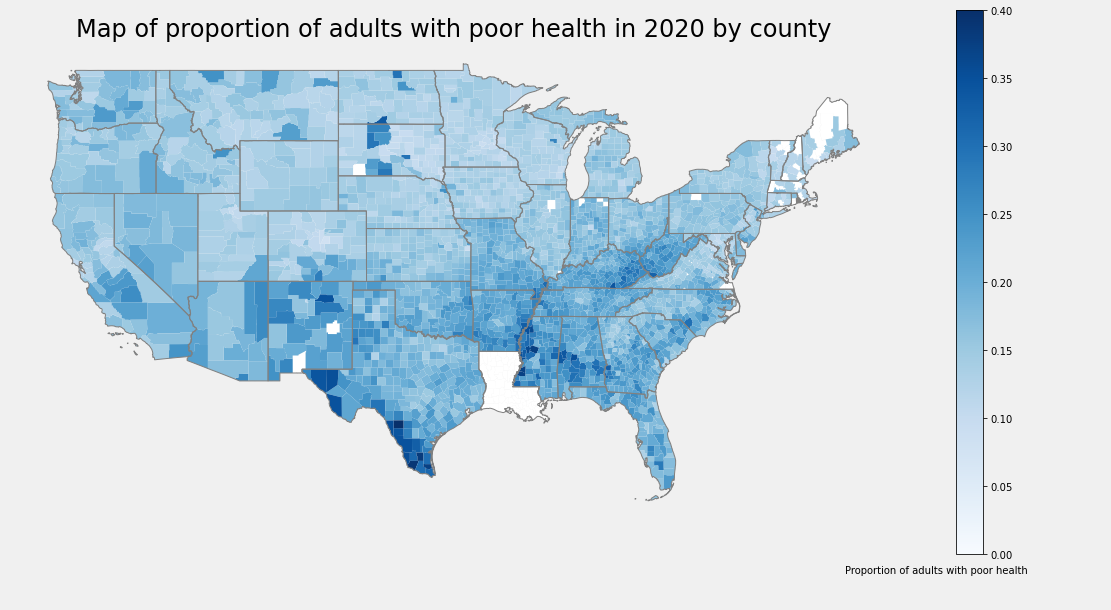

In [393]:
# plot a fine-tuned map of the proportion of adults in poor health in 2020 by county across the continental US
fig, gax = plt.subplots(figsize = (20, 10))
fig.set_facecolor(bgcolour)
ax.set_facecolor(bgcolour)

county_df.plot(ax=gax, color = "white", edgecolor= "None")
merged3_df.plot(
    ax=gax, edgecolor= "None", column="Poor or fair health raw value", cmap = "Blues",legend=True, vmin=0, vmax=.4)
state_df.plot(ax=gax, edgecolor="grey", color="None")

gax.annotate('Proportion of adults with poor health',xy=(0.76, 0.06),  xycoords='figure fraction')

plt.axis('off')
gax.set_title("Map of proportion of adults with poor health in 2020 by county", fontsize=24)

plt.show()

The map above illustrates the proportion of adults who report living in poor health in 2020 by county in the US. The darkest areas on the map represent counties in which the greatest proportion of the population lives in poor health. This is particularly relevant when compared to the COVID-19 deaths map. It is well known that being in poor or frail health is a determining and causal factor that can lead to mortality in the event that one is infected with COVID-19. As an example of how this map may give insight, in the South of Texas there seem to be a cluster of counties in which there are large proportions of people living in poor health – this cluster of counties also experienced high COVID-19 mortality.

* Note: the health data is missing for Louisiana, as well as a small number of other counties across the country

Building off of the visual geographic context provided by the map above, I generated two more visualizations below to capture trends in the health data. First, a histogram illustrates the distribtuion of the proportion of adults who live in poor health by county in the US; second, a scatter plot (with a line of best fit indicates the relationship between the proportion living in poor health in a county and the number of per capita COVID-19 fatalities.

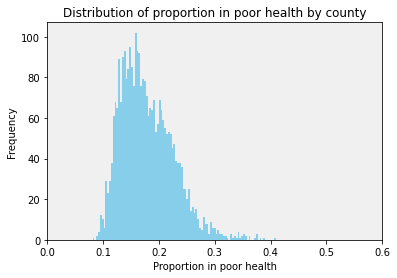

In [394]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.hist(merged3_df["Poor or fair health raw value"], bins = 100, color="skyblue") # plot a histogram
plt.xlim(0, .6) # set x-axis range
plt.xlabel('Proportion in poor health')
plt.ylabel('Frequency')
plt.title('Distribution of proportion in poor health by county')
plt.show()

The graph above illustrates the distribution of the proportion of adults who report living in poor health by county in the US in 2020. There is a slight positive skew in the distribution, and most counties report having under 25% of adults living in poor health. In comparison to the relevant histogram presented earlier in this analysis (the distribution of COVID-19 deaths per capita by county), there is a substantial difference in the shape of the distributions of each variable. The distribution of per capita COVID-19 deaths is much more positively skewed than the distribution of the proportion of adults living in poor health. It is, however, worth investigating the relationship between these variables despite the differences in their distributions. After all, while there is quite significant variation in the propotion living in poor health between counties, we would not expect it to be as relatively large as the differences in the COVID-19 mortality per capita.

In [395]:
pd.options.mode.chained_assignment = None
merged3_df['deaths_pc'] = merged3_df.apply(lambda row: row["deaths"] / row["TotalPop"], axis=1)
# add column that documents per capita deaths to the merged dataframe 

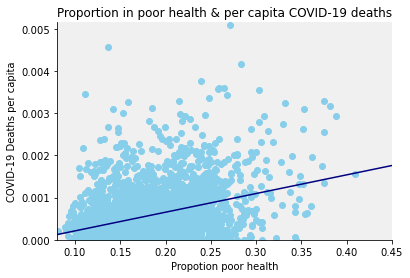

In [396]:
bgcolour = (240/255, 240/255, 240/255) # assign background colour to grey, and subsequently scatter plot colour to aqua
fig, ax = plt.subplots()
ax.set_facecolor(bgcolour)
plt.scatter(merged3_df["Poor or fair health raw value"] , merged3_df["deaths_pc"], color="skyblue") 
# draw a scatter plot illustrating the relationship between prop living in poor health COVID-19 deaths per capita
plt.xlabel('Propotion poor health')
plt.ylabel('COVID-19 Deaths per capita')
plt.title("Proportion in poor health & per capita COVID-19 deaths")

plt.xlim(.08, .45)
plt.ylim(0, .00515)

# plot the regression line of best fit for the scatter plot
lr = LinearRegression()
X = merged3_df["Poor or fair health raw value"].values.reshape(-1, 1)
y = merged3_df["deaths_pc"].values.reshape(-1, 1)
lr.fit(X, y)

# assign the colour of line of best fit as a shade of blue (under the RGB specification below)
colour = ("navy")
x = num.linspace(0.0, 1.0).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color=colour)

# format axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The graph above illustrates the relationship between the proportion of adults living in poor health by county in the US in 2020 and the number of per capita COVID-19 deaths in each county. There is a positive relationship between the two variables – this is reflected in the regression line of best fit. Counties with greater proportions of people living in poor health are correlated with counties with higher per capita deaths of COVID-19 deaths. This is to be expected; it is well documented that COVID-19 death is relatively likelier for individuals living in poor health who become ill with the disease. It is worth pointing out that there is a high concentration of counties with very low COVID-19 mortality per capita. This explains the high number of observations that exist on the low end of the vertical axis.

## Data

In this section, I review the 3 data sources used in this analysis, and briefly summarize the contents and value of each one.

### Original Data: US Election & COVID-19

The main data that I use for this project was assembled by Ethan Schacht in 2020 and is posted on Kaggle.com. The dataset is entitled "Election, COVID, and Demographic Data by County". It provides county statistics for COVID-19 case and death counts, demographic and socioeconomic attributes, and election data for both the 2016 and 2020 Presedential elections.

This data has obvious value to my analysis that attempts to determine the causal impact of COVID-19 on the 2020 US Presidential election. By having the results of the election at the county level, as well as the cumulative total of COVID-19 fatalies leading up to the election, this dataset contains the fundamental variables required for this analysis.

### Scraped Data: State Level Income

The Wikipedia table which I have scraped to supplement my data is available at the link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income. It is the second table from the top on this page titled "States and territories ranked by per capita income". 

This provides my analysis with state-level figures for a variety of income measures – including, income per captita. While likely not as valuable to my analysis as the Fox News exit poll data that I would have ideally harvested, this data has seperate value to my analysos. It may, for instance, aid in understanding how state voting trends in the 2020 election may be explained by the differences in average annual income from state to state (rather than at the county level). It was also instrumental in creating a map that visualized the variation in per capita income from state to state in the US. This map is useful in broadly communicating how trends in income are associated with voting paterns.

### Additional Health Data: County Level Health Indicators

The external health data that I use for this project comes from the dataset "County Health Rankings 2019-2020", assembled by Akhil Raja, and is available on Kaggle.com. The original dataset is extremely rich and provides many county level health indicators. Because of the specific interest in this project in COVID-19 mortality (as it relates to the election), I focused on the proportion of adults who report living in poor health in 2020 in each county column, and then merged this onto my data frame. This data was valuable both for a few of the visualizations in the paper and to help understand what factors contribute to a county's incidence of COVID-19 fatalities. In particular, I find a correlation between the proportion of adults who report living in poor health and the number of per capita COVID-19 deaths. Mapping visualizations also demonstrate that there were geographic clusters of counties that had a large proportion of residents living in poor health that saw severe per capita COVID-19 fatalities. 

## Conclusion & Future Steps

To conclude, this project provides the basis for an analysis into the effect of the COVID-19 pandemic on the outcome of the 2020 US presidential election. Figures regarding the distributions of, and relationships between the independent and dependent variable give reason to believe that, equipped with the proper identification strategy, there may be the opportunity to isolate the causal effect of COVID-19 on the election. Additionally, mapping has provided valuable interpretations to help visualize which regions of the country are most likely to vote for Biden, and which are likeliest to experience a high incidence of COVID-19 mortality – the latter is particularly useful when compared to a map that depicts the proportion of adults living in poor health by county. I have also harvested data external to the original dataset that contains state level income data (in additioned to the aforementioned health data). There is a geographic relationship on the state level between income and the results of the election. 

In terms of future steps, several come to mind. First, I would like to go beyond simply looking at the difference in the proportion who voted for Biden as compared to the 2016 election, and examine any possible influences of increases in voter turnout.  The sizeable increase in turnout in counties that voted overwhelmingly for Democrats in both elections was a determining factor of the outcome; it is worthwhile to see how much of this increase in turnout may have been induced by COVID-19. I would also like to examine other possible independent variables to use as controls – the data is rich with demographic and socioeconomic variables, and I will experiment to see which ones are best suited to this particular analysis. I would also like to quantitatively investigate the relationship between my variables of interest (COVID-19 deaths per capita and the proportion of votes for Biden), and see which controls may be most appropriate – contained in both the demographic variables of the original dataset and the external merged data. This regression analysis will be vital to identifying the true causal effect that the COVID-19 pandemic had on the US election.

Moreover, the US Presidential Election is conducted under the framework of the Electoral College. By extension, certain so-called "swing states" where vote totals are likely to be close are made especially valuable. The fact that Biden flipped six of these swing states (Arizona, Georgia, Michigan, Nevada, Pennsylvania, and Wisconsin) was critical to securing his victory.  By creating a group within the data that isolates these six states – the primary determinants of the outcome of the 2020 election - I have come closer to confirming the effect of the pandemic on the election. This has proved to be a valuable subgroup in evaluating determining factors in the overall outcome. This analysis needs to be subject to a detailed set of control variables to help eliminate endogeneity from the model. Nonetheless, the visualizations at this juncture indicate that the pandemic may very well have been a determining factor in the election.